In [200]:
import torchphysics as tp 
import torch
# Test to learn integrator f -> u with u' = f (data driven)

T = tp.spaces.R1("t") # trunk input
U = tp.spaces.R1("u") # solution
F = tp.spaces.R1("f") # branch input
F2 = tp.spaces.R1("f2") # branch input
K = tp.spaces.R1("k") # parameter for function set

branch_space = tp.spaces.FunctionSpace(T, F)
branch_space2 = tp.spaces.FunctionSpace(T, F2)

domain = tp.domains.Interval(T, 0, 1)
branch_grid = tp.samplers.GridSampler(domain, 100).sample_points()

In [201]:
def custom_fn(t, k):
    return k*t

param_sampler = tp.samplers.RandomUniformSampler(
    tp.domains.Interval(K, -1, 1), 10000
)

custom_functionset = tp.domains.CustomFunctionSet(branch_space, param_sampler, custom_fn)

In [202]:
def custom_fn2(t, k):
    return k*torch.cos(12*t)

custom_functionset2 = tp.domains.CustomFunctionSet(branch_space2, param_sampler, custom_fn2)

functionsampler = tp.samplers.FunctionSamplerRandomUniform(
        100, custom_functionset, function_creation_interval=100
    )

In [203]:
prod_fn_set = custom_functionset * custom_functionset2

In [204]:
prod_fn_set.create_functions()
some_fns = prod_fn_set.get_function([3, 4, 5, 6, 10])

In [205]:
output = some_fns(branch_grid.unsqueeze(0)).as_tensor
output.shape

torch.Size([5, 100, 2])

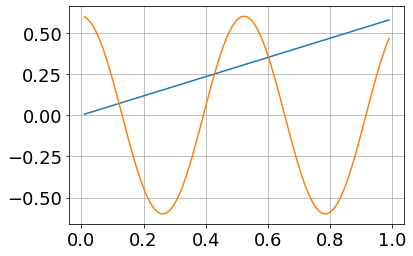

In [206]:
import matplotlib.pyplot as plt
plt.plot(branch_grid.as_tensor, output[0, :, 0])
plt.plot(branch_grid.as_tensor, output[0, :, 1])
plt.grid()

In [207]:
import torchphysics as tp

T = tp.spaces.R1("t")
U = tp.spaces.R1("u")

Fn_space = tp.spaces.FunctionSpace(T, U)
domain = tp.domains.Interval(T, 2, 5)

grid = tp.samplers.GridSampler(domain, 100).sample_points().unsqueeze(0)

harmoinc_fns = tp.domains.HarmonicFunctionSet1D(Fn_space, 1000, 3, 5)
harmoinc_fns.create_functions()
fn = harmoinc_fns.get_function([1, 2, 3, 4, 5])

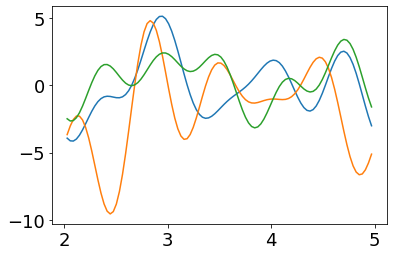

In [208]:
import matplotlib.pyplot as plt
draw_idx = 1
plt.plot(grid.as_tensor[0], fn(grid).as_tensor[0])
plt.plot(grid.as_tensor[0], fn(grid).as_tensor[1])
plt.plot(grid.as_tensor[0], fn(grid).as_tensor[2])

In [209]:
X = tp.spaces.R2("x")
U = tp.spaces.R1("u")

Fn_space = tp.spaces.FunctionSpace(X, U)
domain = tp.domains.Parallelogram(X, [0, 0], [1, 0], [0, 1])

grid = tp.samplers.GridSampler(domain, 128*128).sample_points().unsqueeze(0)

harmoinc_fns = tp.domains.HarmonicFunctionSet2D(Fn_space, 1000, (1, 1), (2, 2))
harmoinc_fns.create_functions()
fn = harmoinc_fns.get_function([1, 2, 3, 4, 5])
fn_eval = fn(grid).as_tensor

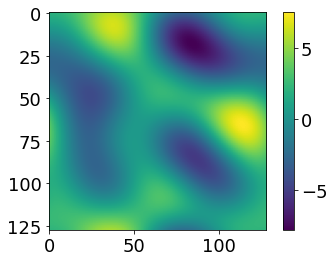

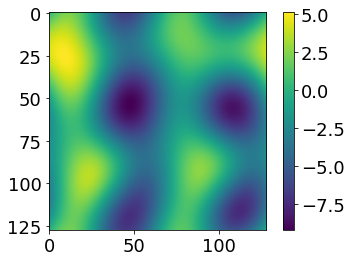

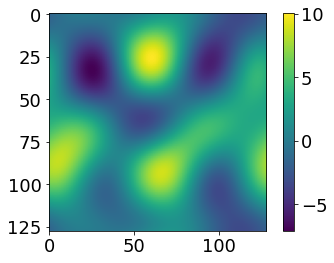

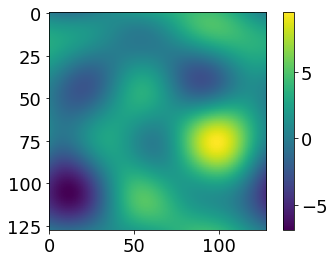

In [210]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.figure(i)
    plt.imshow(fn_eval[i].reshape(128, 128))
    plt.colorbar()

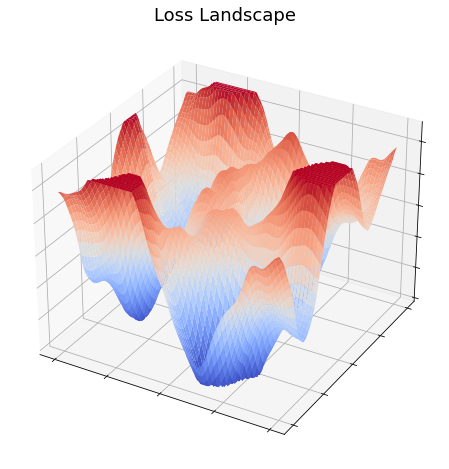

In [211]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random
import math
import matplotlib
SMALL_SIZE = 18
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

X = tp.spaces.R2("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)

def conv_fn(x):
    return 1/(1.0 + 0.05*abs(x[0])**2 + 0.05*abs(x[1])**2)**2

grf_set = tp.domains.GRFFunctionSet(fn_space, 1000, (128, 128), auto_cov_fn=conv_fn)

grf_set.create_functions()
fns = grf_set.get_function([3, 4, 5, 6, 10]).as_tensor

#################################
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-1, 1, 2/128)
X, Y = np.meshgrid(x, y)

Z = fn_eval[0].reshape(128, 128).clone().numpy()

Z += fns[0].reshape(128, 128).numpy()
Z = np.clip(Z, -6, 5) + 5.99
Z /= 100.0
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=1, antialiased=True, rcount=100, ccount=100, alpha=1.0)


ax.set_title('Loss Landscape')
ax.set_zticklabels([])
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

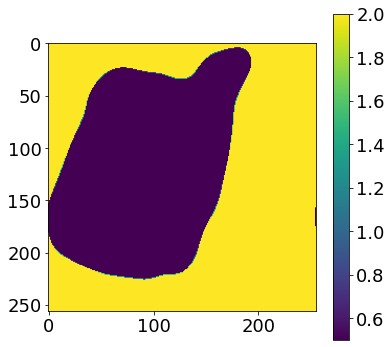

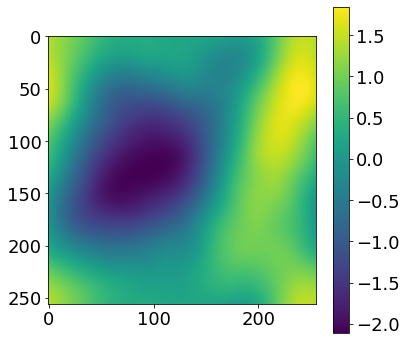

In [212]:
import torchphysics as tp 
import torch
import matplotlib.pyplot as plt

X = tp.spaces.R2("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)

grf_set = tp.domains.GRFFunctionSet(fn_space, 1000, (256, 256))

grf_set.create_functions()
fns = grf_set.get_function([3, 4, 5, 6, 10]).as_tensor

plt.figure(0, figsize=(6, 6))
plt.imshow(0.5 + 1.5*torch.heaviside(fns[0], torch.tensor(0.0)))
plt.colorbar()

plt.figure(1, figsize=(6, 6))
plt.imshow(fns[0])
plt.colorbar()

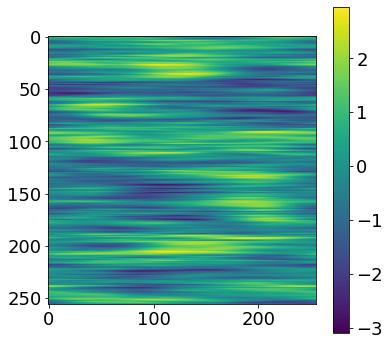

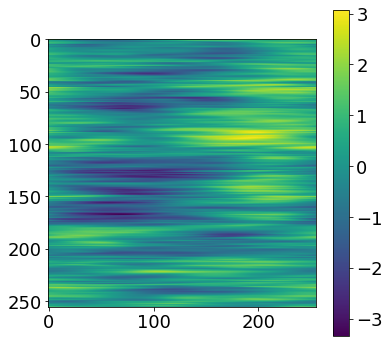

In [213]:
import torchphysics as tp 
import torch
import math
import matplotlib.pyplot as plt

X = tp.spaces.R2("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)

def conv_fn(x):
    return 1/(1.0 + 0.9*math.sqrt(abs(x[0])) + 0.9*abs(x[1])**2)**2

grf_set = tp.domains.GRFFunctionSet(fn_space, 1000, (256, 256), auto_cov_fn=conv_fn)

grf_set.create_functions()
fns = grf_set.get_function([3, 4, 5, 6, 10]).as_tensor

plt.figure(0, figsize=(6, 6))
plt.imshow(fns[0])
plt.colorbar()

plt.figure(1, figsize=(6, 6))
plt.imshow(fns[1])
plt.colorbar()

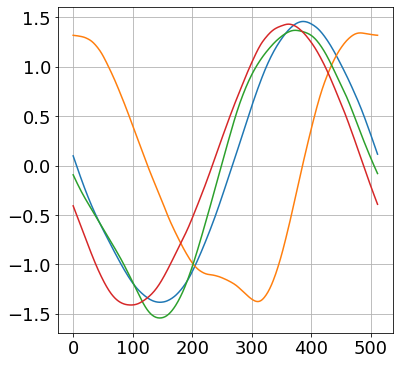

In [214]:
import torchphysics as tp 
import torch
import matplotlib.pyplot as plt

X = tp.spaces.R1("x")
U = tp.spaces.R1("u")

fn_space = tp.spaces.FunctionSpace(X, U)


def cov_fn(x):
    return 1/(0.1 + abs(x[0])**6)**0.5

grf_set = tp.domains.GRFFunctionSet(fn_space, 100, (512, ), auto_cov_fn=cov_fn)

grf_set.create_functions()
grf_images = grf_set.get_function([3, 4, 5, 6, 10]).as_tensor

plt.figure(0, figsize=(6, 6))
plt.plot(grf_images[0])
plt.plot(grf_images[2])
plt.plot(grf_images[3])
plt.plot(grf_images[4])
plt.grid()


In [215]:
import torch

A = torch.ones(10, 8, 8, 2)
B = A.reshape(10, -1, 2)
B.shape

torch.Size([10, 64, 2])

In [216]:
C = [1, 2]
C.extend(A.shape[1:-1])

In [217]:
torch.zeros(C).shape

torch.Size([1, 2, 8, 8])